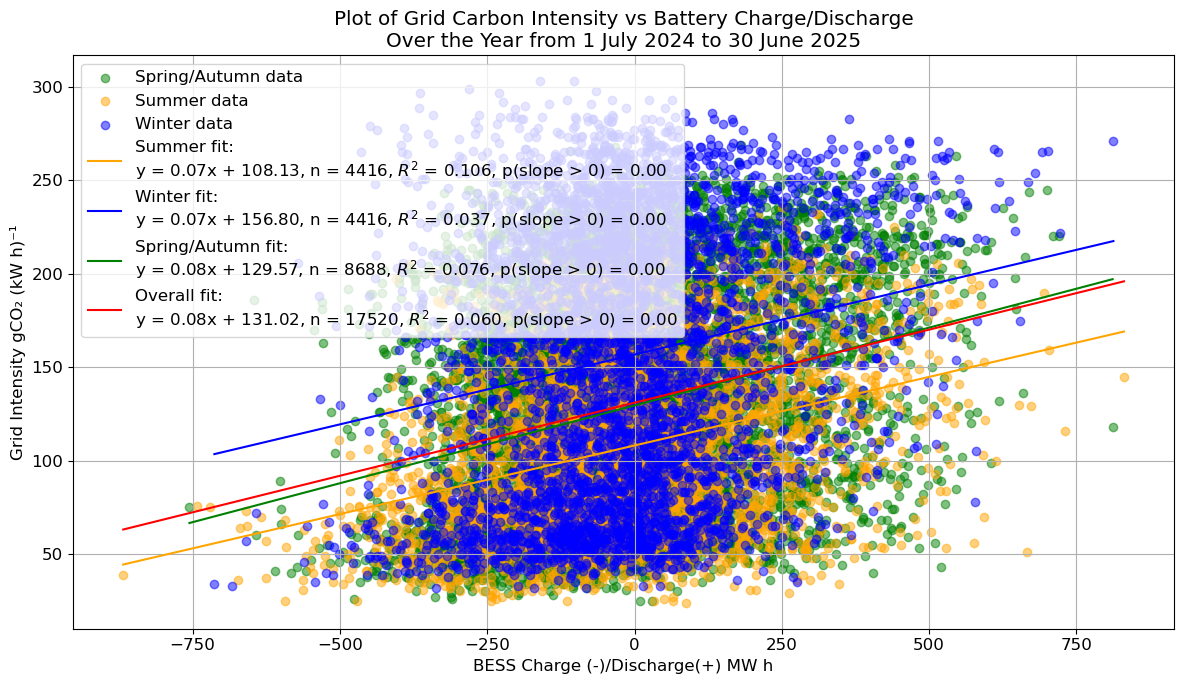

In [1]:
#scatter plot of national GB BESS Energy and Carbon Intensity with seasonal breakdown, includes p-values
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from scipy.stats import t

# === GLOBAL FONT SIZES (min 12) ===
plt.rcParams.update({
    "font.size": 12,
    "axes.labelsize": 12,
    "xtick.labelsize": 12,
    "ytick.labelsize": 12,
    "legend.fontsize": 12,
})

# --- Load and preprocess data ---
csv_path = r"C:\Users\spice\Dropbox\Documents\Imperial 2024.2025\MECH70038 - Research Projects\_My Thesis\Data\Data_1Jul24_to_30Jun25.csv"
df = pd.read_csv(csv_path)

# Parse date
df['Datetime'] = pd.to_datetime(df['SettlementDate'], dayfirst=True)

# Assign seasons
def classify_season(dt):
    m = dt.month
    if m in [11, 12, 1]:
        return 'Winter'
    elif m in [5, 6, 7]:
        return 'Summer'
    else:
        return 'Spring/Autumn'

df['Season'] = df['Datetime'].apply(classify_season)

# Compute net BESS flow
df['BESS_Net'] = df['BESSChargeGB'] + df['BESSDischargeGB']

# --- Plot setup ---
plt.figure(figsize=(12, 7))

# Color map
colors = {
    'Summer': 'orange',
    'Winter': 'blue',
    'Spring/Autumn': 'green'
}

# Scatter plot points by season
for season, group in df.groupby('Season'):
    plt.scatter(group['BESS_Net'], group['CarbonIntensityActualGB'],
                color=colors[season], alpha=0.5, label=f'{season} data')

# --- Regression + annotation function ---
def plot_regression_with_stats(x_vals, y_vals, color, label_prefix):
    n = len(x_vals)
    if n < 3:
        return

    x_vals = pd.Series(x_vals.flatten(), name='BESS_Net')
    y_vals = pd.Series(y_vals.flatten(), name='CI')

    X = sm.add_constant(x_vals)
    model = sm.OLS(y_vals, X).fit()

    slope = model.params['BESS_Net']
    intercept = model.params['const']
    r2 = model.rsquared

    t_slope = model.tvalues['BESS_Net']
    p_slope = 1 - t.cdf(t_slope, df=n - 2) if slope > 0 else 1.0

    # Regression line
    x_line = np.linspace(x_vals.min(), x_vals.max(), 100)
    y_line = intercept + slope * x_line

    plt.plot(
        x_line, y_line, color=color,
        label=(
            f"{label_prefix} fit:\n"
            f"y = {slope:.2f}x + {intercept:.2f}, "
            f"n = {n}, "
            f"$R^2$ = {r2:.3f}, "
            f"p(slope > 0) = {p_slope:.2f}"
        )
    )

# --- Run regressions for each season ---
for season in ['Summer', 'Winter', 'Spring/Autumn']:
    subset = df[df['Season'] == season].dropna(subset=['BESS_Net', 'CarbonIntensityActualGB'])
    x = subset['BESS_Net'].values.reshape(-1, 1)
    y = subset['CarbonIntensityActualGB'].values.reshape(-1, 1)
    plot_regression_with_stats(x, y, color=colors[season], label_prefix=season)

# --- Run regression for full dataset ---
subset_all = df.dropna(subset=['BESS_Net', 'CarbonIntensityActualGB'])
x_all = subset_all['BESS_Net'].values.reshape(-1, 1)
y_all = subset_all['CarbonIntensityActualGB'].values.reshape(-1, 1)
plot_regression_with_stats(x_all, y_all, color='red', label_prefix='Overall')

# --- Final formatting ---
plt.title('Plot of Grid Carbon Intensity vs Battery Charge/Discharge\nOver the Year from 1 July 2024 to 30 June 2025')
plt.xlabel('BESS Charge (-)/Discharge(+) MW h')
plt.ylabel('Grid Intensity gCO₂ (kW h)⁻¹')
plt.legend()
plt.grid(True)
plt.tight_layout()

# Save and show
#plt.savefig("bess_vs_carbon_intensity_seasonal.png", dpi=300)
plt.show()


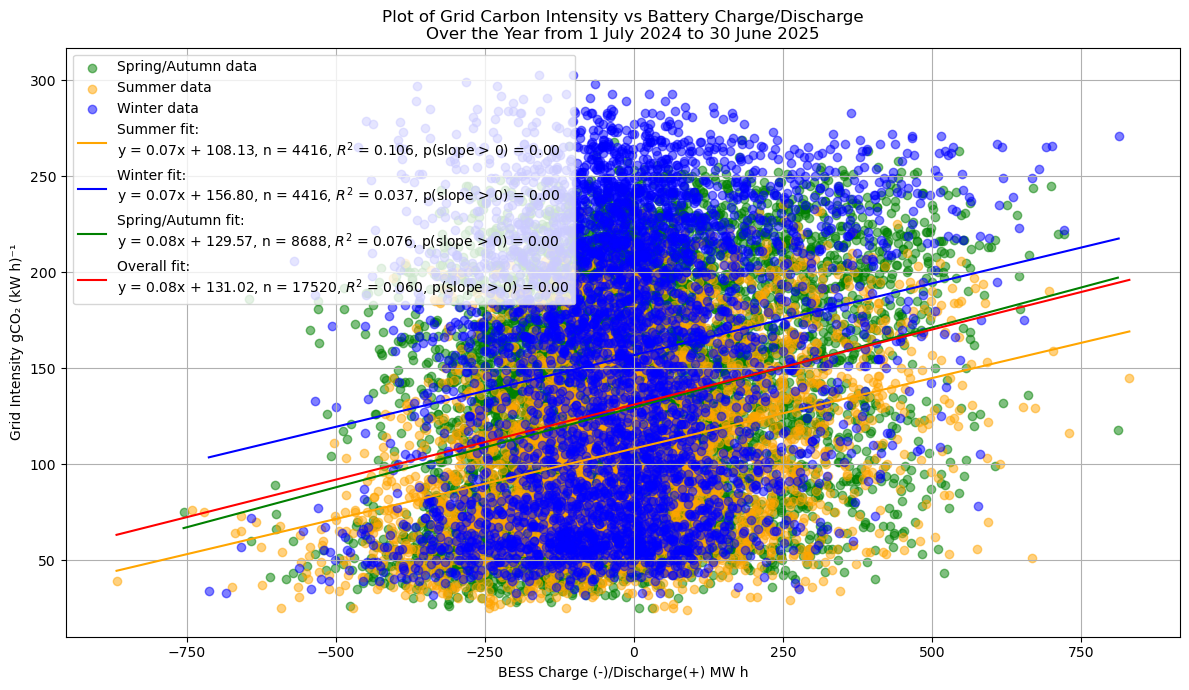

In [1]:
#scatter plot of national GB BESS Energy and Carbon Intensity with seasonal breakdown, includes p-values
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from scipy.stats import t

# --- Load and preprocess data ---
csv_path = r"C:\Users\spice\Dropbox\Documents\Imperial 2024.2025\MECH70038 - Research Projects\_My Thesis\Data\Data_1Jul24_to_30Jun25.csv"
df = pd.read_csv(csv_path)

# Parse date
df['Datetime'] = pd.to_datetime(df['SettlementDate'], dayfirst=True)

# Assign seasons
def classify_season(dt):
    m = dt.month
    if m in [11, 12, 1]:
        return 'Winter'
    elif m in [5, 6, 7]:
        return 'Summer'
    else:
        return 'Spring/Autumn'

df['Season'] = df['Datetime'].apply(classify_season)

# Compute net BESS flow
df['BESS_Net'] = df['BESSChargeGB'] + df['BESSDischargeGB']

# --- Plot setup ---
plt.figure(figsize=(12, 7))

# Color map
colors = {
    'Summer': 'orange',
    'Winter': 'blue',
    'Spring/Autumn': 'green'
}

# Scatter plot points by season
for season, group in df.groupby('Season'):
    plt.scatter(group['BESS_Net'], group['CarbonIntensityActualGB'],
                color=colors[season], alpha=0.5, label=f'{season} data')

# --- Regression + annotation function ---
def plot_regression_with_stats(x_vals, y_vals, color, label_prefix):
    n = len(x_vals)
    if n < 3:
        return

    x_vals = pd.Series(x_vals.flatten(), name='BESS_Net')
    y_vals = pd.Series(y_vals.flatten(), name='CI')

    X = sm.add_constant(x_vals)
    model = sm.OLS(y_vals, X).fit()

    slope = model.params['BESS_Net']
    intercept = model.params['const']
    r2 = model.rsquared

    t_slope = model.tvalues['BESS_Net']
    p_slope = 1 - t.cdf(t_slope, df=n - 2) if slope > 0 else 1.0

    # Regression line
    x_line = np.linspace(x_vals.min(), x_vals.max(), 100)
    y_line = intercept + slope * x_line

    plt.plot(
        x_line, y_line, color=color,
        label=(
            f"{label_prefix} fit:\n"
            f"y = {slope:.2f}x + {intercept:.2f}, "
            f"n = {n}, "
            f"$R^2$ = {r2:.3f}, "
            f"p(slope > 0) = {p_slope:.2f}"
        )
    )

# --- Run regressions for each season ---
for season in ['Summer', 'Winter', 'Spring/Autumn']:
    subset = df[df['Season'] == season].dropna(subset=['BESS_Net', 'CarbonIntensityActualGB'])
    x = subset['BESS_Net'].values.reshape(-1, 1)
    y = subset['CarbonIntensityActualGB'].values.reshape(-1, 1)
    plot_regression_with_stats(x, y, color=colors[season], label_prefix=season)

# --- Run regression for full dataset ---
subset_all = df.dropna(subset=['BESS_Net', 'CarbonIntensityActualGB'])
x_all = subset_all['BESS_Net'].values.reshape(-1, 1)
y_all = subset_all['CarbonIntensityActualGB'].values.reshape(-1, 1)
plot_regression_with_stats(x_all, y_all, color='red', label_prefix='Overall')

# --- Final formatting ---
plt.title('Plot of Grid Carbon Intensity vs Battery Charge/Discharge\nOver the Year from 1 July 2024 to 30 June 2025')
plt.xlabel('BESS Charge (-)/Discharge(+) MW h')
plt.ylabel('Grid Intensity gCO₂ (kW h)⁻¹')
plt.legend()
plt.grid(True)
plt.tight_layout()

# Save and show
#plt.savefig("bess_vs_carbon_intensity_seasonal.png", dpi=300)
plt.show()


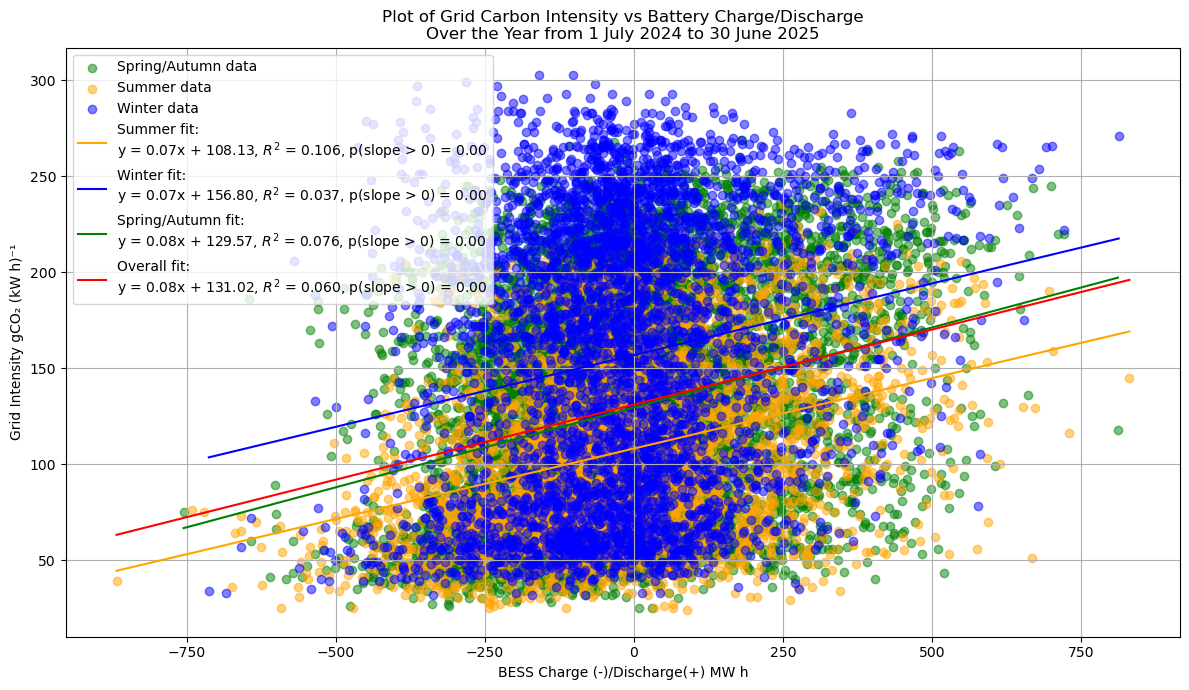

In [ ]:
#scatter plot of national GB BESS Energy and Carbon Intensity with seasonal breakdown, includes p-values
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from scipy.stats import t

# --- Load and preprocess data ---
csv_path = r"C:\Users\spice\Dropbox\Documents\Imperial 2024.2025\MECH70038 - Research Projects\_My Thesis\Data\Data_1Jul24_to_30Jun25.csv"
df = pd.read_csv(csv_path)

# Parse date
df['Datetime'] = pd.to_datetime(df['SettlementDate'], dayfirst=True)

# Assign seasons
def classify_season(dt):
    m = dt.month
    if m in [11, 12, 1]:
        return 'Winter'
    elif m in [5, 6, 7]:
        return 'Summer'
    else:
        return 'Spring/Autumn'

df['Season'] = df['Datetime'].apply(classify_season)

# Compute net BESS flow
df['BESS_Net'] = df['BESSChargeGB'] + df['BESSDischargeGB']

# --- Plot setup ---
plt.figure(figsize=(12, 7))

# Color map
colors = {
    'Summer': 'orange',
    'Winter': 'blue',
    'Spring/Autumn': 'green'
}

# Scatter plot points by season
for season, group in df.groupby('Season'):
    plt.scatter(group['BESS_Net'], group['CarbonIntensityActualGB'],
                color=colors[season], alpha=0.5, label=f'{season} data')

# --- Regression + annotation function ---
def plot_regression_with_stats(x_vals, y_vals, color, label_prefix):
    n = len(x_vals)
    if n < 3:
        return

    x_vals = pd.Series(x_vals.flatten(), name='BESS_Net')
    y_vals = pd.Series(y_vals.flatten(), name='CI')

    X = sm.add_constant(x_vals)
    model = sm.OLS(y_vals, X).fit()

    slope = model.params['BESS_Net']
    intercept = model.params['const']
    r2 = model.rsquared

    t_slope = model.tvalues['BESS_Net']
    p_slope = 1 - t.cdf(t_slope, df=n - 2) if slope > 0 else 1.0

    # Regression line
    x_line = np.linspace(x_vals.min(), x_vals.max(), 100)
    y_line = intercept + slope * x_line

    plt.plot(x_line, y_line, color=color,
             label=f'{label_prefix} fit:\n'
                   f'y = {slope:.2f}x + {intercept:.2f}, '
                   f'$R^2$ = {r2:.3f}, p(slope > 0) = {p_slope:.2f}')

# --- Run regressions for each season ---
for season in ['Summer', 'Winter', 'Spring/Autumn']:
    subset = df[df['Season'] == season].dropna(subset=['BESS_Net', 'CarbonIntensityActualGB'])
    x = subset['BESS_Net'].values.reshape(-1, 1)
    y = subset['CarbonIntensityActualGB'].values.reshape(-1, 1)
    plot_regression_with_stats(x, y, color=colors[season], label_prefix=season)

# --- Run regression for full dataset ---
subset_all = df.dropna(subset=['BESS_Net', 'CarbonIntensityActualGB'])
x_all = subset_all['BESS_Net'].values.reshape(-1, 1)
y_all = subset_all['CarbonIntensityActualGB'].values.reshape(-1, 1)
plot_regression_with_stats(x_all, y_all, color='red', label_prefix='Overall')

# --- Final formatting ---
plt.title('Plot of Grid Carbon Intensity vs Battery Charge/Discharge\nOver the Year from 1 July 2024 to 30 June 2025')
plt.xlabel('BESS Charge (-)/Discharge(+) MW h')
plt.ylabel('Grid Intensity gCO₂ (kW h)⁻¹')
plt.legend()
plt.grid(True)
plt.tight_layout()

# Save and show
#plt.savefig("bess_vs_carbon_intensity_seasonal.png", dpi=300)
plt.show()


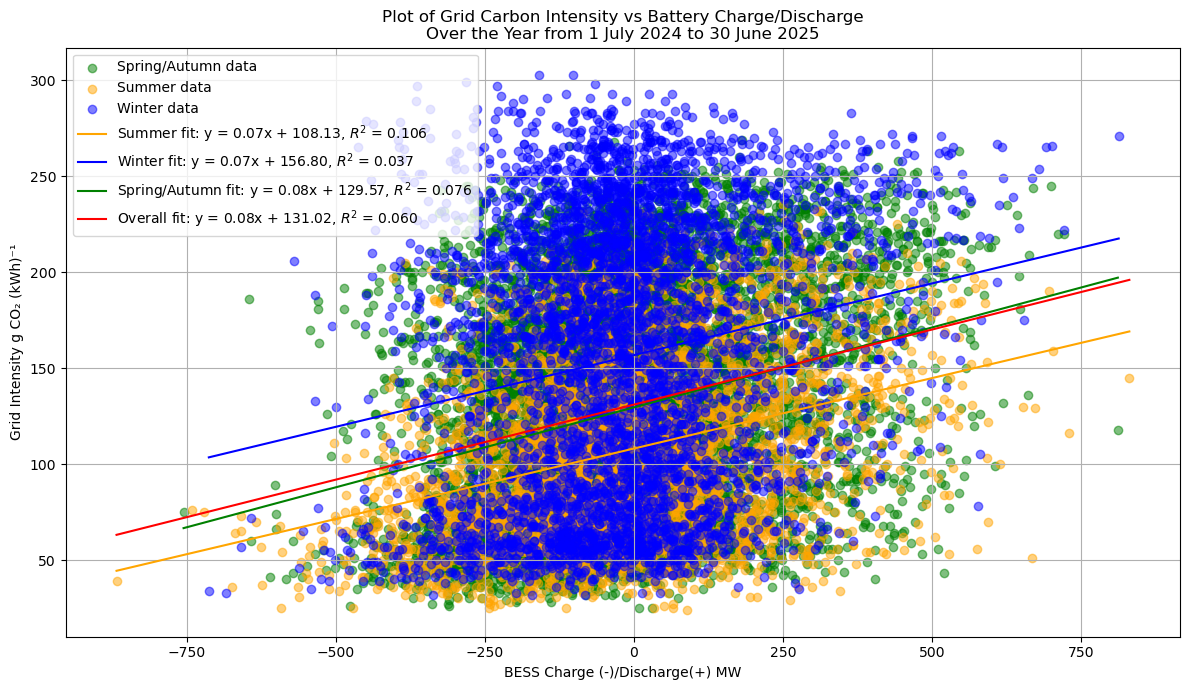

In [ ]:
#scatter plot of national GB BESS Energy and Carbon Intensity with seasonal breakdown
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import numpy as np

# Load data
csv_path = r"C:\Users\spice\Dropbox\Documents\Imperial 2024.2025\MECH70038 - Research Projects\_My Thesis\Data\Data_1Jul24_to_30Jun25.csv"
df = pd.read_csv(csv_path)

# Convert SettlementDate to datetime
df['Datetime'] = pd.to_datetime(df['SettlementDate'], dayfirst=True)

# Define seasons
def classify_season(dt):
    m = dt.month
    if m in [11, 12, 1]:
        return 'Winter'
    elif m in [5, 6, 7]:
        return 'Summer'
    else:
        return 'Spring/Autumn'

df['Season'] = df['Datetime'].apply(classify_season)

# Compute net BESS flow
df['BESS_Net'] = df['BESSChargeGB'] + df['BESSDischargeGB']

# Initialize plot
plt.figure(figsize=(12, 7))

# Define colors
colors = {
    'Summer': 'orange',
    'Winter': 'blue',
    'Spring/Autumn': 'green',
    'Overall': 'red'
}

# Plot scatter points
for season, group in df.groupby('Season'):
    plt.scatter(group['BESS_Net'], group['CarbonIntensityActualGB'],
                label=f'{season} data', color=colors[season], alpha=0.5)

# Function to fit and plot regression line
def plot_regression(x_vals, y_vals, color, label_prefix):
    model = LinearRegression().fit(x_vals, y_vals)
    slope = model.coef_[0][0]
    intercept = model.intercept_[0]
    r2 = model.score(x_vals, y_vals)
    
    x_line = np.linspace(x_vals.min(), x_vals.max(), 100).reshape(-1, 1)
    y_line = model.predict(x_line)
    
    plt.plot(x_line, y_line, color=color,
             label=f'{label_prefix} fit: y = {slope:.2f}x + {intercept:.2f}, $R^2$ = {r2:.3f}')
    
# Plot seasonal regressions
for season in ['Summer', 'Winter', 'Spring/Autumn']:
    subset = df[df['Season'] == season]
    x = subset['BESS_Net'].values.reshape(-1, 1)
    y = subset['CarbonIntensityActualGB'].values.reshape(-1, 1)
    plot_regression(x, y, color=colors[season], label_prefix=season)

# Plot overall regression
x_all = df['BESS_Net'].values.reshape(-1, 1)
y_all = df['CarbonIntensityActualGB'].values.reshape(-1, 1)
plot_regression(x_all, y_all, color='red', label_prefix='Overall')

# Final plot formatting
plt.title('Plot of Grid Carbon Intensity vs Battery Charge/Discharge\nOver the Year from 1 July 2024 to 30 June 2025')
plt.xlabel('BESS Charge (-)/Discharge(+) MW')
plt.ylabel('Grid Intensity g CO₂ (kWh)⁻¹')
plt.legend()
plt.grid(True)
plt.tight_layout()
# Save to file (before showing)
#plt.savefig("bess_vs_carbon_intensity.pdf") 
plt.show()


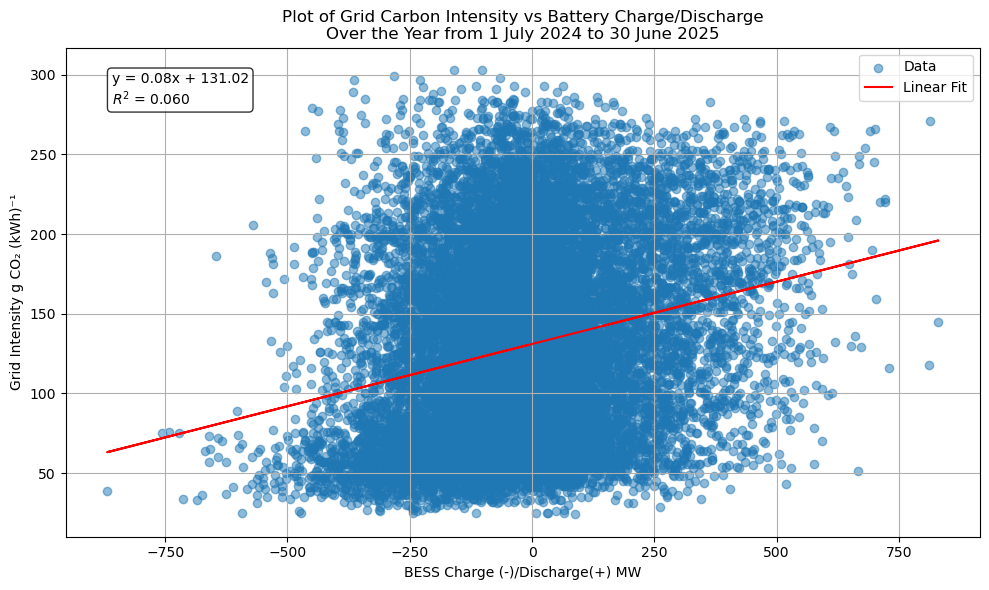

In [5]:
#Scatter Plot and Correlation - standard scatter plot

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import numpy as np

# Load data
csv_path = r"C:\Users\spice\Dropbox\Documents\Imperial 2024.2025\MECH70038 - Research Projects\_My Thesis\Data\Data_1Jul24_to_30Jun25.csv"
df = pd.read_csv(csv_path)

# Create the x (charge + discharge) and y (carbon intensity) variables
df['BESS_Net'] = df['BESSChargeGB'] + df['BESSDischargeGB']
x = df['BESS_Net'].values.reshape(-1, 1)
y = df['CarbonIntensityActualGB'].values.reshape(-1, 1)

# Fit linear regression
reg = LinearRegression().fit(x, y)
slope = reg.coef_[0][0]
intercept = reg.intercept_[0]
r_squared = reg.score(x, y)

# Create plot
plt.figure(figsize=(10, 6))
plt.scatter(x, y, alpha=0.5, label='Data')
plt.plot(x, reg.predict(x), color='red', label='Linear Fit')

# Labels and title
plt.title('Plot of Grid Carbon Intensity vs Battery Charge/Discharge\nOver the Year from 1 July 2024 to 30 June 2025')
plt.xlabel('BESS Charge (-)/Discharge(+) MW')
plt.ylabel('Grid Intensity g CO₂ (kWh)⁻¹')

# Annotate regression equation
eq = f'y = {slope:.2f}x + {intercept:.2f}\n$R^2$ = {r_squared:.3f}'
plt.text(0.05, 0.95, eq, transform=plt.gca().transAxes,
         fontsize=10, verticalalignment='top', bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()




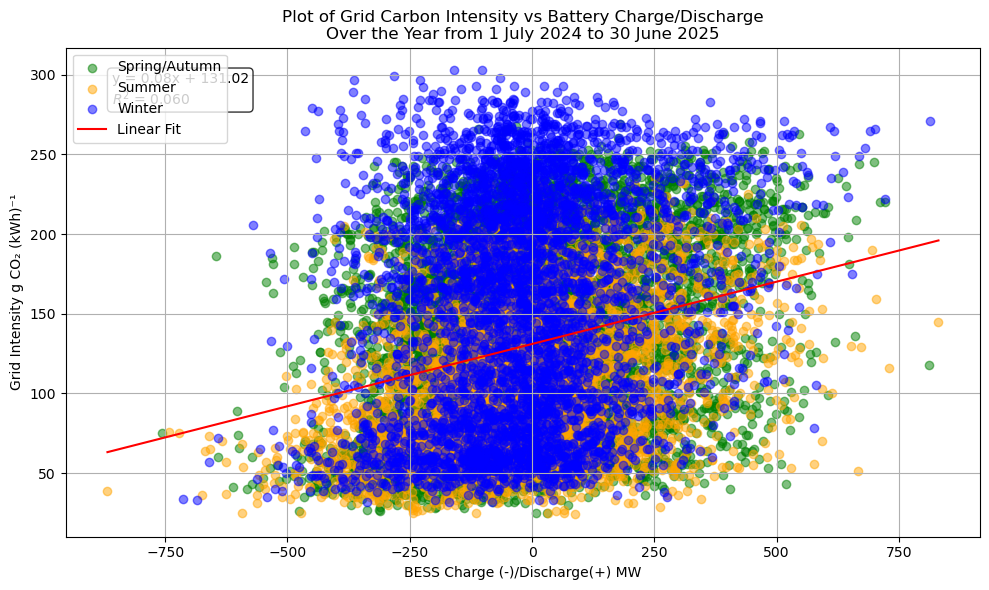

In [7]:
# This is a scatter plot that has different values for seasons

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import numpy as np

# Load data
csv_path = r"C:\Users\spice\Dropbox\Documents\Imperial 2024.2025\MECH70038 - Research Projects\_My Thesis\Data\Data_1Jul24_to_30Jun25.csv"
df = pd.read_csv(csv_path)

# Parse SettlementDate as datetime (day first format)
df['Datetime'] = pd.to_datetime(df['SettlementDate'], dayfirst=True)

# Define season based on month
def classify_season(dt):
    m = dt.month
    if m in [11, 12, 1]:
        return 'Winter'
    elif m in [5, 6, 7]:
        return 'Summer'
    else:
        return 'Spring/Autumn'

df['Season'] = df['Datetime'].apply(classify_season)

# Compute net BESS flow (charge + discharge)
df['BESS_Net'] = df['BESSChargeGB'] + df['BESSDischargeGB']
x = df['BESS_Net'].values.reshape(-1, 1)
y = df['CarbonIntensityActualGB'].values.reshape(-1, 1)

# Linear regression
reg = LinearRegression().fit(x, y)
slope = reg.coef_[0][0]
intercept = reg.intercept_[0]
r_squared = reg.score(x, y)

# Plot
plt.figure(figsize=(10, 6))

# Color map for seasons
colors = {
    'Summer': 'orange',
    'Winter': 'blue',
    'Spring/Autumn': 'green'
}

# Plot each season with its own color
for season, group in df.groupby('Season'):
    plt.scatter(group['BESS_Net'], group['CarbonIntensityActualGB'],
                label=season, alpha=0.5, color=colors[season])

# Regression line
x_line = np.linspace(df['BESS_Net'].min(), df['BESS_Net'].max(), 100).reshape(-1, 1)
plt.plot(x_line, reg.predict(x_line), color='red', label='Linear Fit')

# Labels and annotations
plt.title('Plot of Grid Carbon Intensity vs Battery Charge/Discharge\nOver the Year from 1 July 2024 to 30 June 2025')
plt.xlabel('BESS Charge (-)/Discharge(+) MW')
plt.ylabel('Grid Intensity g CO₂ (kWh)⁻¹')

# Regression annotation
eq = f'y = {slope:.2f}x + {intercept:.2f}\n$R^2$ = {r_squared:.3f}'
plt.text(0.05, 0.95, eq, transform=plt.gca().transAxes,
         fontsize=10, verticalalignment='top', bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

